## Тест

In [1]:
# import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636


from popframe.models.region import Region

region_model = Region.from_pickle('data/Ленинградская область.pickle')
grid = gpd.read_file('/Users/mvin/Code/PopFrame/examples/level_3.geojson', engine="pyogrio")
grid

,territory_id,territory_type,parent,name,level,properties,admin_center,target_city_type,okato_code,oktmo_code,is_city,created_at,updated_at,geometry
0,2,"{ ""id"": 2, ""name"": ""Бокситогорский муниципальн...","{ ""id"": 1, ""name"": ""Бокситогорский муниципальн...",Бокситогорский муниципальный район,3,"{ ""Малые города"": 2, ""Крупные города"": 0, ""Чис...","{ ""id"": 328, ""name"": ""г. Бокситогорск"" }",None,41203000000,41603000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.796000+00:00,"POLYGON ((34.32834 59.19564, 34.32777 59.19548..."
1,10,"{ ""id"": 2, ""name"": ""Волосовский муниципальный ...","{ ""id"": 1, ""name"": ""Волосовский муниципальный ...",Волосовский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1268, ""name"": ""г. Волосово"" }",None,41206000000,41606000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.239000+00:00,"POLYGON ((28.98894 59.48069, 28.98604 59.48401..."
2,18,"{ ""id"": 2, ""name"": ""Волховский муниципальный р...","{ ""id"": 1, ""name"": ""Волховский муниципальный р...",Волховский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1469, ""name"": ""г. Волхов"" }",None,41209000000,41609000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:30.078000+00:00,"POLYGON ((32.85314 60.51175, 32.84899 60.50379..."
3,34,"{ ""id"": 2, ""name"": ""Всеволожский муниципальный...","{ ""id"": 1, ""name"": ""Всеволожский муниципальный...",Всеволожский муниципальный район,3,"{ ""Малые города"": 1, ""Крупные города"": 0, ""Чис...","{ ""id"": 1750, ""name"": ""г. Всеволожск"" }",None,41212000000,41612000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:19.695000+00:00,"MULTIPOLYGON (((30.55161 59.96981, 30.552 59.9..."
4,54,"{ ""id"": 2, ""name"": ""Выборгский муниципальный р...","{ ""id"": 1, ""name"": ""Выборгский муниципальный р...",Выборгский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1902, ""name"": ""г. Выборг"" }",None,41215000000,41615000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:20.801000+00:00,"POLYGON ((28.9964 60.03638, 28.8588 60.04, 28...."
5,67,"{ ""id"": 2, ""name"": ""Гатчинский муниципальный р...","{ ""id"": 1, ""name"": ""Гатчинский муниципальный р...",Гатчинский муниципальный район,3,"{ ""Малые города"": 14, ""Крупные города"": 0, ""Чи...","{ ""id"": 2082, ""name"": ""г. Гатчина"" }",None,41218000000,41618000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:22.625000+00:00,"POLYGON ((29.63489 59.57073, 29.63372 59.57069..."
6,85,"{ ""id"": 2, ""name"": ""Кингисеппский муниципальны...","{ ""id"": 1, ""name"": ""Кингисеппский муниципальны...",Кингисеппский муниципальный район,3,"{ ""Малые города"": 4, ""Крупные города"": 0, ""Чис...","{ ""id"": 466, ""name"": ""г. Кингисепп"" }",None,41221000000,41621000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:23.108000+00:00,"POLYGON ((28.19199 59.32665, 28.19187 59.32671..."
7,97,"{ ""id"": 2, ""name"": ""Киришский муниципальный ра...","{ ""id"": 1, ""name"": ""Киришский муниципальный ра...",Киришский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 656, ""name"": ""г. Кириши"" }",None,41224000000,41624000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:18:36.040000+00:00,"POLYGON ((31.94177 59.42479, 31.94327 59.42428..."
8,104,"{ ""id"": 2, ""name"": ""Кировский муниципальный ра...","{ ""id"": 1, ""name"": ""Кировский муниципальный ра...",Кировский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 733, ""name"": ""г. Кировск"" }",None,41225000000,41625000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:24.580000+00:00,"POLYGON ((31.91715 59.95987, 31.91722 59.95916..."
9,116,"{ ""id"": 2, ""name"": ""Лодейнопольский муниципаль...","{ ""id"": 1, ""name"": ""Лодейнопольский муниципаль...",Лодейнопольский муниципальный район,3,"{ ""Малые города"": 3, ""Крупные города"": 0

In [2]:
from popframe.method.territory_evaluation import TerritoryEvaluation

evaluation = TerritoryEvaluation(region=region_model)

results = evaluation.population_criterion(territories_gdf=grid)
scores_df = pd.DataFrame(results)
scores_df

,project,average_population_density,total_population,score,interpretation
0,Бокситогорский муниципальный район,2.3,110702,3.0,Территория имеет показатели численности и плот...
1,Волосовский муниципальный район,4.6,95506,3.0,Территория имеет показатели численности и плот...
2,Волховский муниципальный район,1.0,55820,3.0,Территория имеет показатели численности и плот...
3,Всеволожский муниципальный район,18.6,675145,4.0,Территория имеет хорошие показатели численност...
4,Выборгский муниципальный район,3.2,222317,3.0,Территория имеет показатели численности и плот...
5,Гатчинский муниципальный район,14.2,322467,4.0,Территория имеет хорошие показатели численност...
6,Кингисеппский муниципальный район,1.9,100522,3.0,Территория имеет показатели численности и плот...
7,Киришский муниципальный район,2.5,60860,3.0,Территория имеет показатели численности и плот...
8,Кировский муниципальный район,5.7,196735,3.0,Территория имеет показатели численности и плот...
9,Лодейнопольский муниципальный район,0.6,27878,3.0,Территория имеет показатели численности и плот...


In [3]:
results

[{'project': 'Бокситогорский муниципальный район',
  'average_population_density': 2.3,
  'total_population': 110702,
  'score': 3.0,
  'interpretation': 'Территория имеет показатели численности и плотности населения выше среднего, что указывает на возможность развития территории.'},
 {'project': 'Волосовский муниципальный район',
  'average_population_density': 4.6,
  'total_population': 95506,
  'score': 3.0,
  'interpretation': 'Территория имеет показатели численности и плотности населения выше среднего, что указывает на возможность развития территории.'},
 {'project': 'Волховский муниципальный район',
  'average_population_density': 1.0,
  'total_population': 55820,
  'score': 3.0,
  'interpretation': 'Территория имеет показатели численности и плотности населения выше среднего, что указывает на возможность развития территории.'},
 {'project': 'Всеволожский муниципальный район',
  'average_population_density': 18.6,
  'total_population': 675145,
  'score': 4.0,
  'interpretation': '

In [4]:
grid['score'] = scores_df['score']
grid

,territory_id,territory_type,parent,name,level,properties,admin_center,target_city_type,okato_code,oktmo_code,is_city,created_at,updated_at,geometry,score
0,2,"{ ""id"": 2, ""name"": ""Бокситогорский муниципальн...","{ ""id"": 1, ""name"": ""Бокситогорский муниципальн...",Бокситогорский муниципальный район,3,"{ ""Малые города"": 2, ""Крупные города"": 0, ""Чис...","{ ""id"": 328, ""name"": ""г. Бокситогорск"" }",None,41203000000,41603000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.796000+00:00,"POLYGON ((34.32834 59.19564, 34.32777 59.19548...",3.0
1,10,"{ ""id"": 2, ""name"": ""Волосовский муниципальный ...","{ ""id"": 1, ""name"": ""Волосовский муниципальный ...",Волосовский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1268, ""name"": ""г. Волосово"" }",None,41206000000,41606000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.239000+00:00,"POLYGON ((28.98894 59.48069, 28.98604 59.48401...",3.0
2,18,"{ ""id"": 2, ""name"": ""Волховский муниципальный р...","{ ""id"": 1, ""name"": ""Волховский муниципальный р...",Волховский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1469, ""name"": ""г. Волхов"" }",None,41209000000,41609000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:30.078000+00:00,"POLYGON ((32.85314 60.51175, 32.84899 60.50379...",3.0
3,34,"{ ""id"": 2, ""name"": ""Всеволожский муниципальный...","{ ""id"": 1, ""name"": ""Всеволожский муниципальный...",Всеволожский муниципальный район,3,"{ ""Малые города"": 1, ""Крупные города"": 0, ""Чис...","{ ""id"": 1750, ""name"": ""г. Всеволожск"" }",None,41212000000,41612000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:19.695000+00:00,"MULTIPOLYGON (((30.55161 59.96981, 30.552 59.9...",4.0
4,54,"{ ""id"": 2, ""name"": ""Выборгский муниципальный р...","{ ""id"": 1, ""name"": ""Выборгский муниципальный р...",Выборгский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1902, ""name"": ""г. Выборг"" }",None,41215000000,41615000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:20.801000+00:00,"POLYGON ((28.9964 60.03638, 28.8588 60.04, 28....",3.0
5,67,"{ ""id"": 2, ""name"": ""Гатчинский муниципальный р...","{ ""id"": 1, ""name"": ""Гатчинский муниципальный р...",Гатчинский муниципальный район,3,"{ ""Малые города"": 14, ""Крупные города"": 0, ""Чи...","{ ""id"": 2082, ""name"": ""г. Гатчина"" }",None,41218000000,41618000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:22.625000+00:00,"POLYGON ((29.63489 59.57073, 29.63372 59.57069...",4.0
6,85,"{ ""id"": 2, ""name"": ""Кингисеппский муниципальны...","{ ""id"": 1, ""name"": ""Кингисеппский муниципальны...",Кингисеппский муниципальный район,3,"{ ""Малые города"": 4, ""Крупные города"": 0, ""Чис...","{ ""id"": 466, ""name"": ""г. Кингисепп"" }",None,41221000000,41621000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:23.108000+00:00,"POLYGON ((28.19199 59.32665, 28.19187 59.32671...",3.0
7,97,"{ ""id"": 2, ""name"": ""Киришский муниципальный ра...","{ ""id"": 1, ""name"": ""Киришский муниципальный ра...",Киришский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 656, ""name"": ""г. Кириши"" }",None,41224000000,41624000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:18:36.040000+00:00,"POLYGON ((31.94177 59.42479, 31.94327 59.42428...",3.0
8,104,"{ ""id"": 2, ""name"": ""Кировский муниципальный ра...","{ ""id"": 1, ""name"": ""Кировский муниципальный ра...",Кировский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 733, ""name"": ""г. Кировск"" }",None,41225000000,41625000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:24.580000+00:00,"POLYGON ((31.91715 59.95987, 31.91722 59.95916...",3.0
9,116,"{ ""id"": 2, ""name"": ""Лодейнопольский муниципаль...","{ ""id"": 1, ""name"": ""Лодейнопольский муниципаль...",Лодейнопольский муниципальный район,3,"{ 

In [5]:
# grid.to_file("grid_population_score.geojson", driver="GeoJSON")

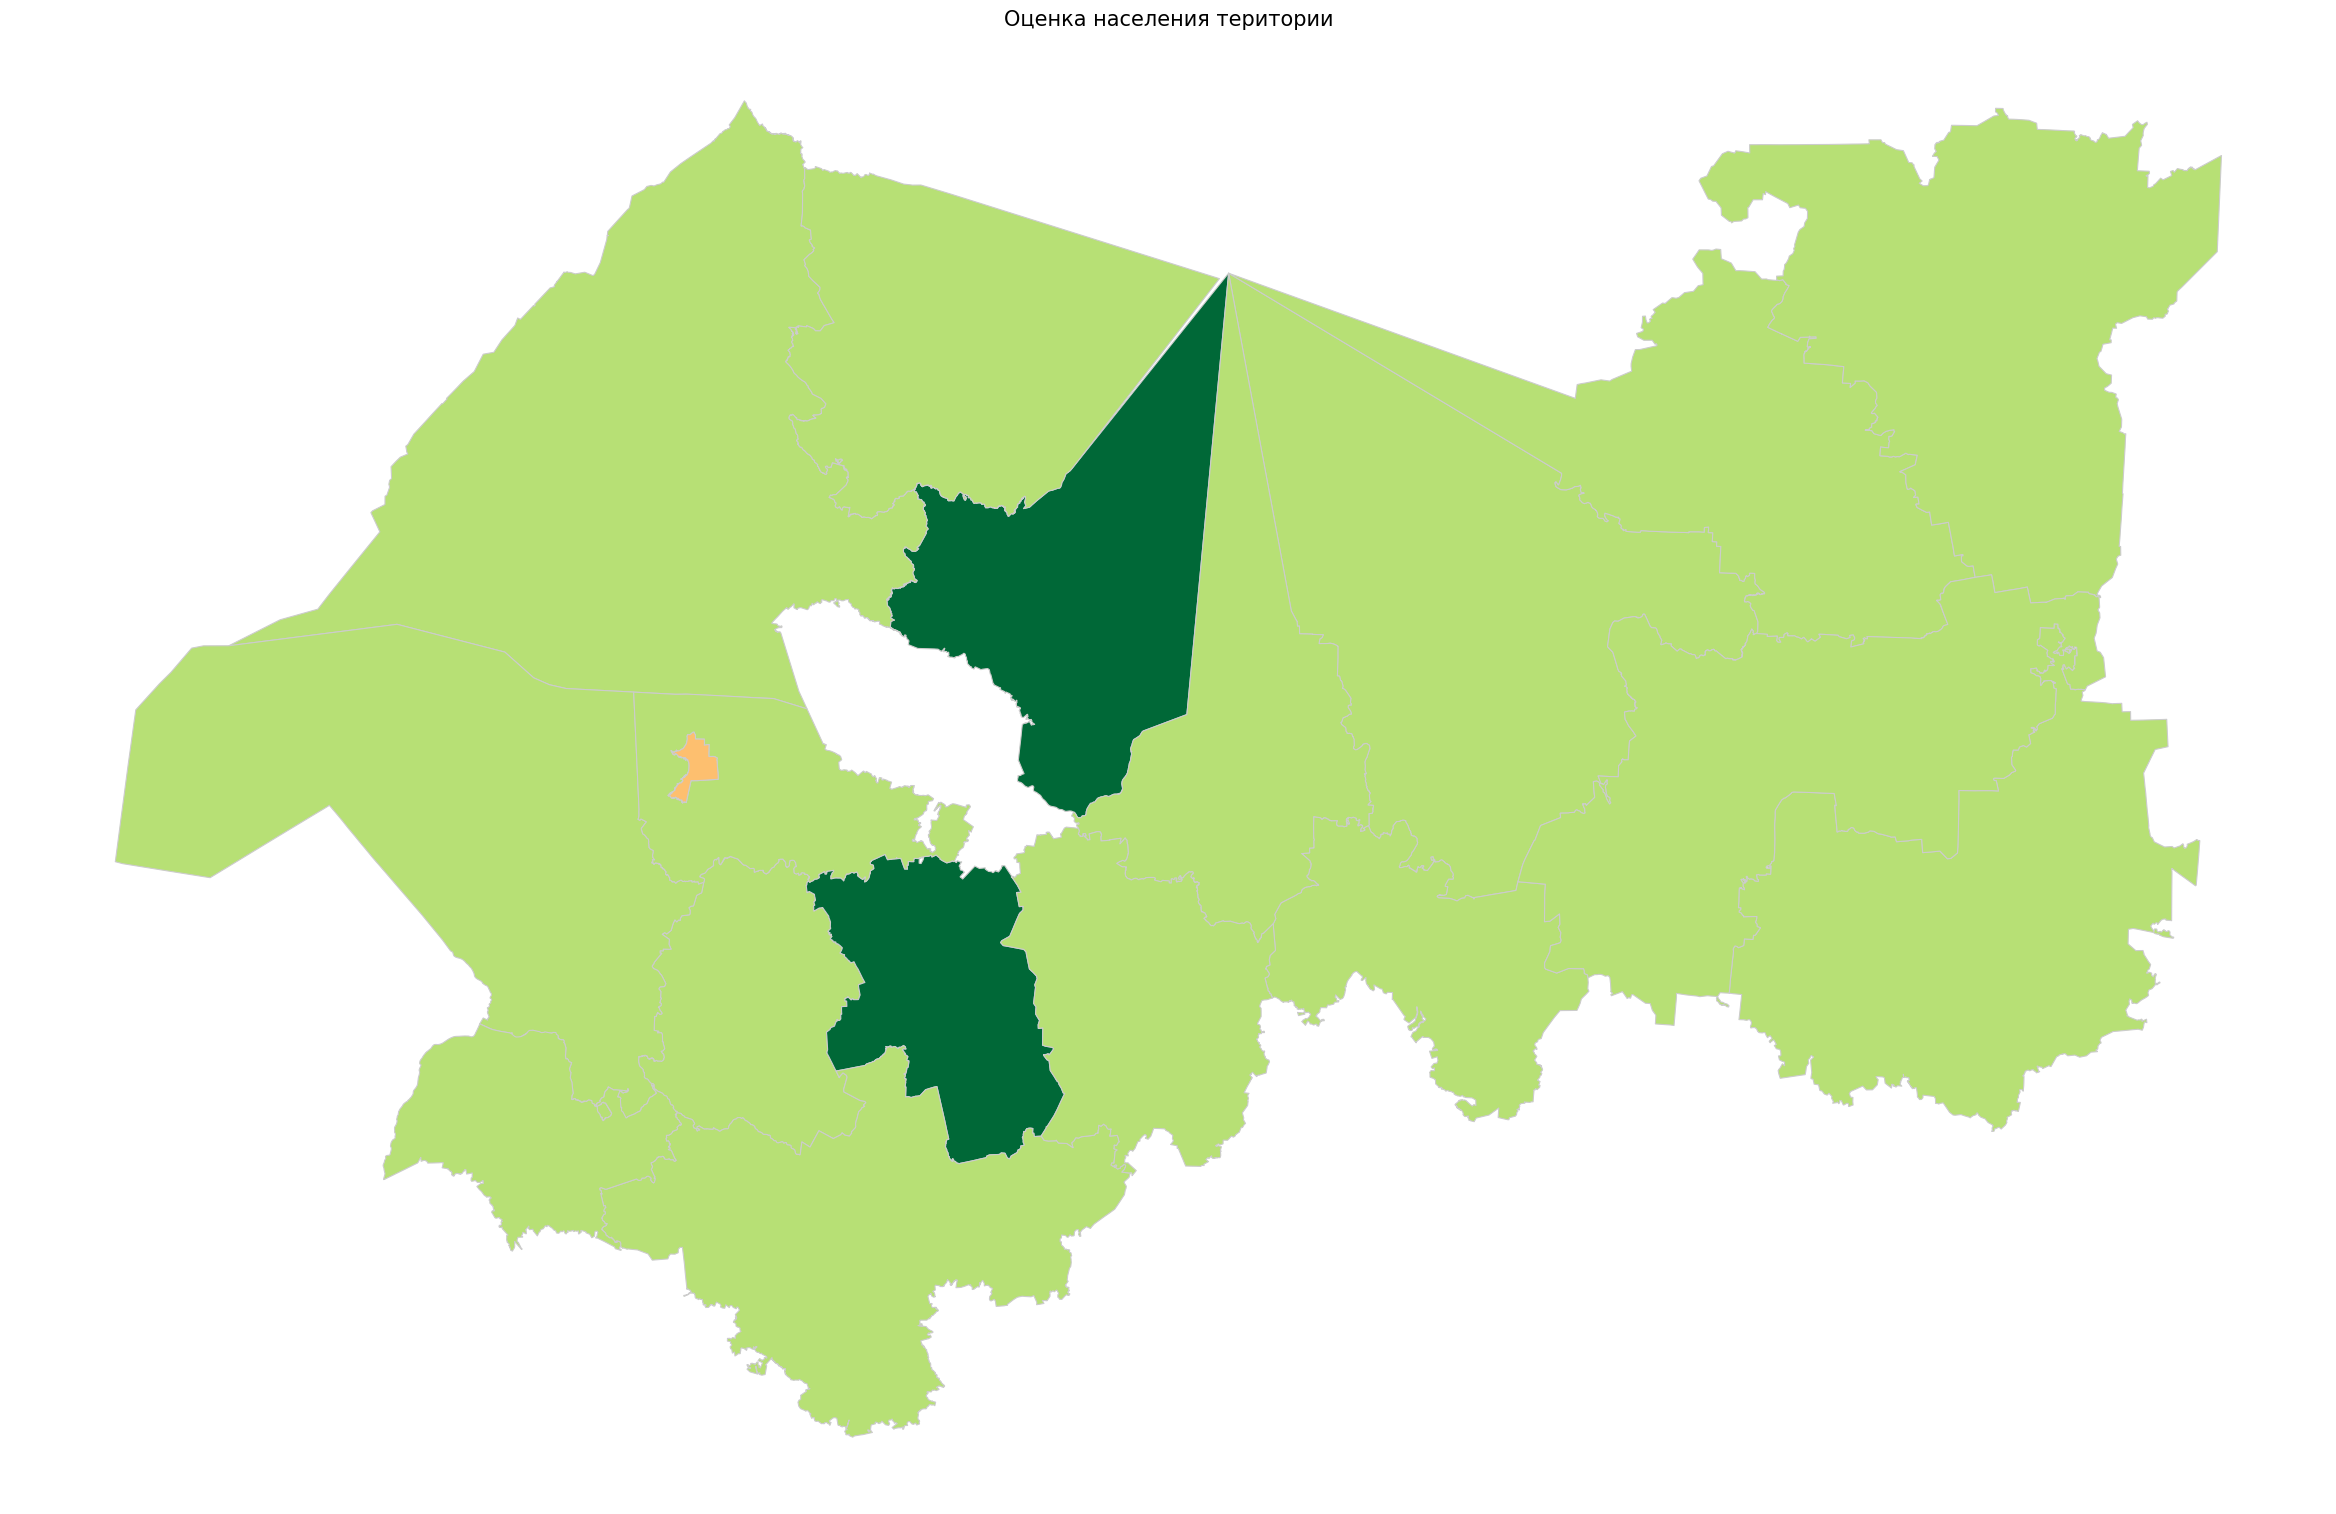

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Предположим, что у вас есть GeoDataFrame с колонкой 'score'
# gdf содержит геометрию и колонку с оценками ('score')

# Определяем цветовую карту: от красного (низкий score) к зелёному (высокий score)
cmap = cm.get_cmap('RdYlGn')

# Определяем нормализацию значений для цветовой карты, начиная с 1
norm = colors.Normalize(vmin=1, vmax=grid['score'].max())

# Создаём карту
fig, ax = plt.subplots(1, 1, figsize=(30, 15))  # Увеличиваем размер карты

# Функция для задания цвета
def get_color(score):
    if score == 0:
        return 'black'  # Окрашиваем в черный если score равен 0
    else:
        return cmap(norm(score))  # Используем цветовую карту для оценок от 1 и выше

# Применяем цвета к каждой области
grid['color'] = grid['score'].apply(get_color)

# Визуализируем с раскраской по значению 'color'
grid.plot(color=grid['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Отключаем оси
ax.set_axis_off()

# Настраиваем автоматическое управление компоновкой
plt.tight_layout()

# Добавляем заголовок
ax.set_title('Оценка населения територии', fontsize=15)

# Показать карту
plt.show()



In [7]:
from popframe.method.territory_evaluation import TerritoryEvaluation

evaluation = TerritoryEvaluation(region=region_model)

results = evaluation.evaluate_territory_location(territories_gdf=grid)
scores_df = pd.DataFrame(results)
scores_df

,territory,score,interpretation,closest_settlement,closest_settlement1,closest_settlement2
0,Бокситогорский муниципальный район,5,Территория находится внутри или непосредственн...,Бокситогорск,None,None
1,Волосовский муниципальный район,5,Территория находится внутри или непосредственн...,Волосово,None,None
2,Волховский муниципальный район,5,Территория находится внутри или непосредственн...,Волхов,None,None
3,Всеволожский муниципальный район,6,Территория находится внутри или непосредственн...,Всеволожск,None,None
4,Выборгский муниципальный район,6,Территория находится внутри или непосредственн...,Выборг,None,None
5,Гатчинский муниципальный район,6,Территория находится внутри или непосредственн...,Гатчина,None,None
6,Кингисеппский муниципальный район,5,Территория находится внутри или непосредственн...,Кингисепп,None,None
7,Киришский муниципальный район,6,Территория находится внутри или непосредственн...,Кириши,None,None
8,Кировский муниципальный район,5,Территория находится внутри или непосредственн...,Кировск,None,None
9,Лодейнопольский муниципальный район,5,Территория находится внутри или непосредственн...,Лодейное Поле,None,None


In [8]:
sorted_blocks = scores_df.sort_values(by=['score'], ascending=False)
sorted_blocks

,territory,score,interpretation,closest_settlement,closest_settlement1,closest_settlement2
16,Тихвинский муниципальный район,6,Территория находится внутри или непосредственн...,Тихвин,None,None
3,Всеволожский муниципальный район,6,Территория находится внутри или непосредственн...,Всеволожск,None,None
4,Выборгский муниципальный район,6,Территория находится внутри или непосредственн...,Выборг,None,None
5,Гатчинский муниципальный район,6,Территория находится внутри или непосредственн...,Гатчина,None,None
7,Киришский муниципальный район,6,Территория находится внутри или непосредственн...,Кириши,None,None
0,Бокситогорский муниципальный район,5,Территория находится внутри или непосредственн...,Бокситогорск,None,None
11,Лужский муниципальный район,5,Территория находится внутри или непосредственн...,Луга,None,None
14,Сланцевский муниципальный район,5,Территория находится внутри или непосредственн...,Сланцы,None,None
13,Приозерский муниципальный район,5,Территория находится внутри или непосредственн...,Сосново,None,None
12,Подпорожский муниципальный район,5,Территория находится внутри или непосредственн...,Подпорожье,None,None


In [9]:
grid['score_2'] = scores_df['score']
grid

,territory_id,territory_type,parent,name,level,properties,admin_center,target_city_type,okato_code,oktmo_code,is_city,created_at,updated_at,geometry,score,color,score_2
0,2,"{ ""id"": 2, ""name"": ""Бокситогорский муниципальн...","{ ""id"": 1, ""name"": ""Бокситогорский муниципальн...",Бокситогорский муниципальный район,3,"{ ""Малые города"": 2, ""Крупные города"": 0, ""Чис...","{ ""id"": 328, ""name"": ""г. Бокситогорск"" }",None,41203000000,41603000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.796000+00:00,"POLYGON ((34.32834 59.19564, 34.32777 59.19548...",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",5
1,10,"{ ""id"": 2, ""name"": ""Волосовский муниципальный ...","{ ""id"": 1, ""name"": ""Волосовский муниципальный ...",Волосовский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1268, ""name"": ""г. Волосово"" }",None,41206000000,41606000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:18.239000+00:00,"POLYGON ((28.98894 59.48069, 28.98604 59.48401...",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",5
2,18,"{ ""id"": 2, ""name"": ""Волховский муниципальный р...","{ ""id"": 1, ""name"": ""Волховский муниципальный р...",Волховский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1469, ""name"": ""г. Волхов"" }",None,41209000000,41609000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:30.078000+00:00,"POLYGON ((32.85314 60.51175, 32.84899 60.50379...",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",5
3,34,"{ ""id"": 2, ""name"": ""Всеволожский муниципальный...","{ ""id"": 1, ""name"": ""Всеволожский муниципальный...",Всеволожский муниципальный район,3,"{ ""Малые города"": 1, ""Крупные города"": 0, ""Чис...","{ ""id"": 1750, ""name"": ""г. Всеволожск"" }",None,41212000000,41612000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:19.695000+00:00,"MULTIPOLYGON (((30.55161 59.96981, 30.552 59.9...",4.0,"(0.0, 0.40784313725490196, 0.21568627450980393...",6
4,54,"{ ""id"": 2, ""name"": ""Выборгский муниципальный р...","{ ""id"": 1, ""name"": ""Выборгский муниципальный р...",Выборгский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 1902, ""name"": ""г. Выборг"" }",None,41215000000,41615000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:20.801000+00:00,"POLYGON ((28.9964 60.03638, 28.8588 60.04, 28....",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",6
5,67,"{ ""id"": 2, ""name"": ""Гатчинский муниципальный р...","{ ""id"": 1, ""name"": ""Гатчинский муниципальный р...",Гатчинский муниципальный район,3,"{ ""Малые города"": 14, ""Крупные города"": 0, ""Чи...","{ ""id"": 2082, ""name"": ""г. Гатчина"" }",None,41218000000,41618000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:22.625000+00:00,"POLYGON ((29.63489 59.57073, 29.63372 59.57069...",4.0,"(0.0, 0.40784313725490196, 0.21568627450980393...",6
6,85,"{ ""id"": 2, ""name"": ""Кингисеппский муниципальны...","{ ""id"": 1, ""name"": ""Кингисеппский муниципальны...",Кингисеппский муниципальный район,3,"{ ""Малые города"": 4, ""Крупные города"": 0, ""Чис...","{ ""id"": 466, ""name"": ""г. Кингисепп"" }",None,41221000000,41621000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:17:23.108000+00:00,"POLYGON ((28.19199 59.32665, 28.19187 59.32671...",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",5
7,97,"{ ""id"": 2, ""name"": ""Киришский муниципальный ра...","{ ""id"": 1, ""name"": ""Киришский муниципальный ра...",Киришский муниципальный район,3,"{ ""Малые города"": 0, ""Крупные города"": 0, ""Чис...","{ ""id"": 656, ""name"": ""г. Кириши"" }",None,41224000000,41624000,False,2024-06-16 21:35:40.802000+00:00,2024-11-14 12:18:36.040000+00:00,"POLYGON ((31.94177 59.42479, 31.94327 59.42428...",3.0,"(0.7176470588235296, 0.8797385620915034, 0.458...",6
8,104,"{ ""id"": 2, ""name"": ""Кировский муниципальный ра...","{ ""id"": 1, ""name"": ""Кировский муниципальный ра...",Ки

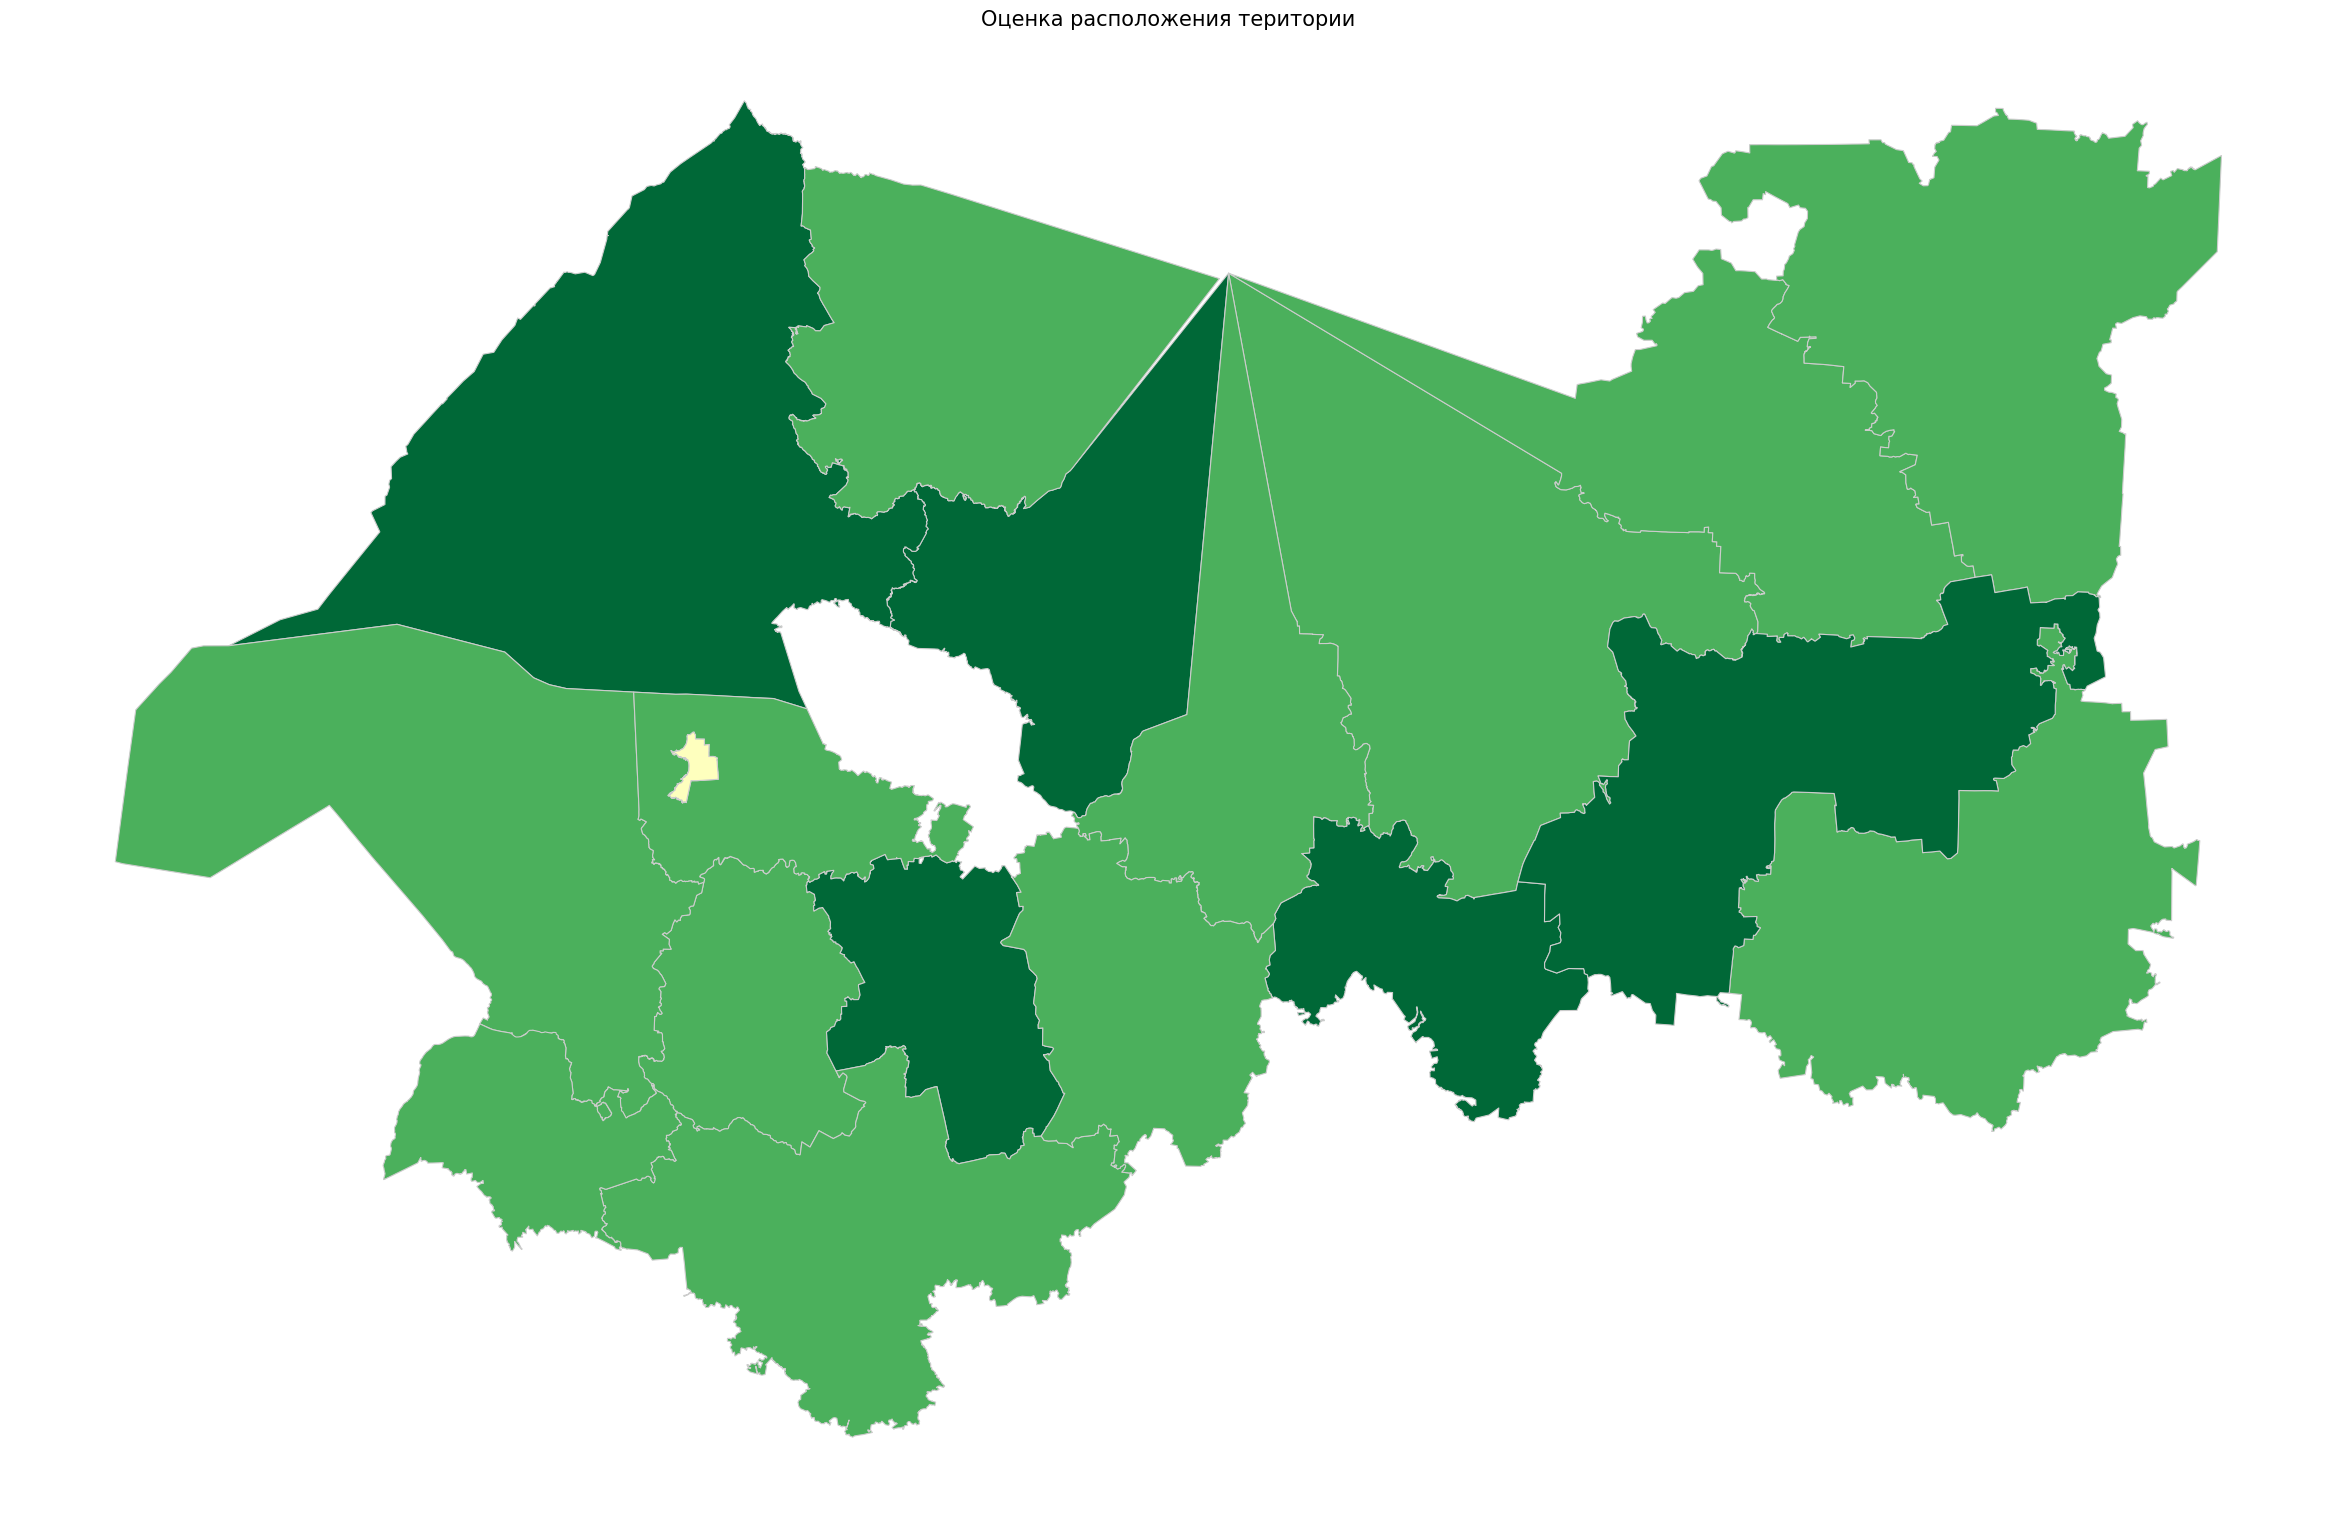

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Предположим, что у вас есть GeoDataFrame с колонкой 'score'
# gdf содержит геометрию и колонку с оценками ('score')

# Определяем цветовую карту: от красного (низкий score) к зелёному (высокий score)
cmap = cm.get_cmap('RdYlGn')

# Определяем нормализацию значений для цветовой карты, начиная с 1
norm = colors.Normalize(vmin=0, vmax=grid['score_2'].max())

# Создаём карту
fig, ax = plt.subplots(1, 1, figsize=(30, 15))  # Увеличиваем размер карты

# Функция для задания цвета
def get_color(score):
    if score == 0:
        return 'black'  # Окрашиваем в черный если score равен 0
    else:
        return cmap(norm(score))  # Используем цветовую карту для оценок от 1 и выше

# Применяем цвета к каждой области
grid['color'] = grid['score_2'].apply(get_color)

# Визуализируем с раскраской по значению 'color'
grid.plot(color=grid['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Отключаем оси
ax.set_axis_off()

# Настраиваем автоматическое управление компоновкой
plt.tight_layout()

# Добавляем заголовок
ax.set_title('Оценка расположения територии', fontsize=15)

# Показать карту
plt.show()
